#  Generating Gravitational-Wave Waveforms
This tutorial has been adapted from [Tutorial 1.4](https://github.com/gw-odw/odw-2020/blob/master/Day_1/Tuto%201.4%20Generating%20waveforms.ipynb) of the GW Open Data Workshop \#3

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which is used to study gravitational-wave data, find astrophysical sources due to compact binary mergers, and study their parameters. These are some of the same tools that the LIGO and Virgo collaborations use to find gravitational waves in LIGO/Virgo data 

In this tutorial we will walk through how to generate a gravitational waveform for a compacy binary merger signal. These are the types of signals that LIGO-Virgo has already detected. The gravitational waves emitted by these types of signals are predictable using General Relativity, although they require advanced numerical methods to solve.

Additional [examples](http://pycbc.org/pycbc/latest/html/#library-examples-and-interactive-tutorials) and module level documentation are [here](http://pycbc.org/pycbc/latest/html/py-modindex.html)

###  Installation  (execute only if running on a cloud platform)

PyCBC is installable through pip. It relies on portions of the [LALSuite]() c-library. A bundled version of this suitable for use with PyCBC is also available on Mac / Linux through pip.

In [1]:
# -- Uncomment following line if running in Google Colab
#! pip install -q 'PyCBC==1.15.3' 'lalsuite==6.66'

**Important:** With Google Colab, you may need to restart the runtime after running the cell above.

### Initialization

In [1]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

### Generate your first waveform !

Here we'll generate the gravitational waveform using one of the available waveform approximants. These can be generated as a time series using [`get_td_waveform`](http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform). There are some additional examples using this interface [here](http://pycbc.org/pycbc/latest/html/waveform.html). The key parameters are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to generate. A variety of approximants are available that include different physical effects. A full review of the different models is outside of the scope of this tutorial.

In this example, we've chosen to use the 'SEOBNRv4_opt' model. There are many others available as well with different methodologies and which include different physical effects. This is an implementation of the model introduced [in this paper](https://arxiv.org/pdf/1611.03703.pdf). It models the gravitational waveform of inspiralling and merging black holes, and includes the ability for each black hole to spin in the same direction as the orbital angular momentum (aligned spin).

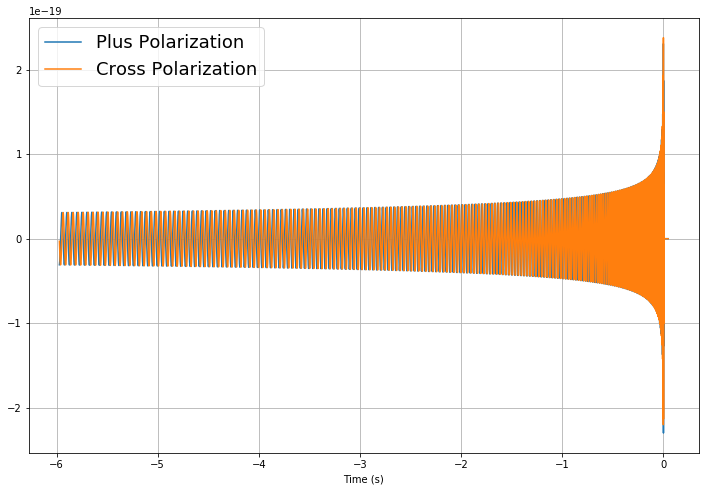

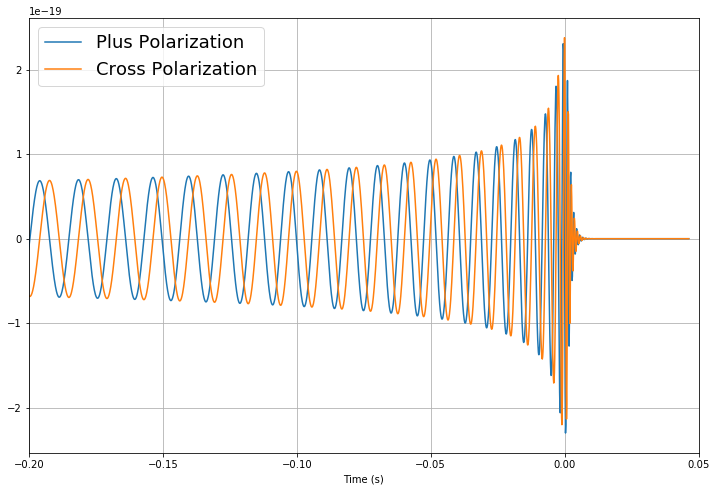

In [11]:
# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp1, hc1 = get_td_waveform(approximant="SEOBNRv4P",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/8192,
                         f_lower=20)

fig = pylab.figure(figsize=(12,8))
pylab.plot(hp1.sample_times, hp1, label='Plus Polarization')
pylab.plot(hp1.sample_times, hc1, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.legend(prop={'size': 18})
pylab.grid()
pylab.show()

# Zoom in near the merger time#
fig2 = pylab.figure(figsize=(12,8))
pylab.plot(hp1.sample_times, hp1, label='Plus Polarization')
pylab.plot(hp1.sample_times, hc1, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.2, .05)
pylab.legend(prop={'size': 18})
pylab.grid()
pylab.show()

We can see that in the this case, the two polarizations differ only by the phase of the signal. This holds for systems where the orbital plane of the binary doesn't precess. In the zoom-in plot, we can see the merger itself and the ringdown that follows.

### How does the waveform change with the mass of the binary?

Below you can see how the length of the waveform increases for lower mass binary mergers. Here we write a for loop to generate waveforms for four different masses assuming the binary components have equal mass. What does it mean for the waveform length to increase for lower mass systems? How long is each waveform in seconds? What happens if you change the starting frequency, `f_lower`?

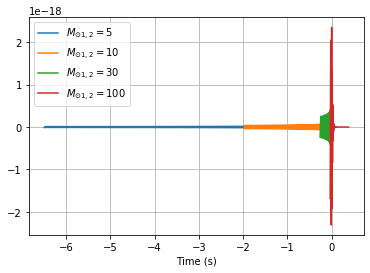

[6.513916015625, 2.013427734375, 0.37548828125, 0.41552734375]


In [10]:
# Component mass of each binary component. We'll simplify here and assume that each 
# component of the binary has the same mass. Again, units are in solar masses.
t = []
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                         f_lower=30)
    t.append(hp.sample_times[-1]-hp.sample_times[0])
    
    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.show()
print(t)

### Changing the distance of the waveform

The distance of the waveform is also selectable when you generate a waveform. The units used are Megaparsecs. There is a simple inverse relationship between distance and amplitude, $A(f) \propto 1/d_{L}$. Does the length of the waveform change when you change the distance? Why?

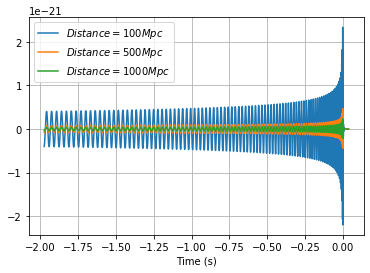

In [4]:
for d in [100, 500, 1000]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)
    
    pylab.plot(hp.sample_times, hp, label='$Distance=%sMpc$' % d)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.show()

### Changing the spin of the binary components
Black holes and neutron stars in binaries can also be spinning, like how the Earth rotates around its own axis. Here we will see how the spin affects the waveform. We use dimensionless spin to characterize how fast the compact object is spinning, with a possible range from 0-1. How does the spin affect the length of the waveform?

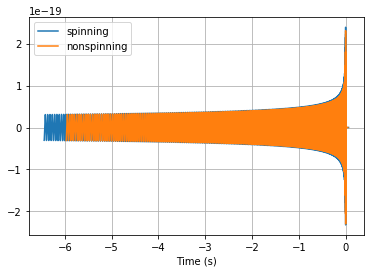

In [12]:
hp2, hc2 = get_td_waveform(approximant="SEOBNRv4P",
                         mass1=10,
                         mass2=10,
                         spin1z=0.9,
                         spin2z=0.9,
                         delta_t=1.0/8192,
                         f_lower=20)
pylab.plot(hp2.sample_times, hp2, label='spinning')
pylab.plot(hp1.sample_times, hp1, label='nonspinning')
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.show()

### Exercise

Generate and plot the waveform associated to the binary neutron star merger GW170817. Look for the event name on [this list](https://www.gw-openscience.org/eventapi/html/allevents/) to retreive the estimated masses for this event.

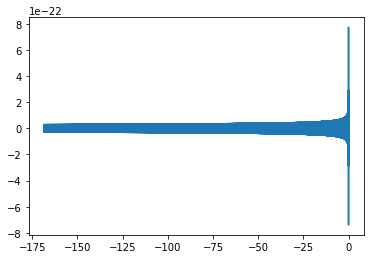

In [20]:
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=1.46,
                         mass2=1.27,
                         delta_t=1.0/16384,
                         f_lower=20,
                         distance=40)
pylab.plot(hp.sample_times, hp)

Now generate the waveform for another binary neutron star merger. Assume it has the same total mass as GW170817, but set the masses so that `mass1 = 2*mass2`. What are the resultant masses you should use? How does the waveform change compared to the one you plotted above?

188.35675048828125
168.39532470703125


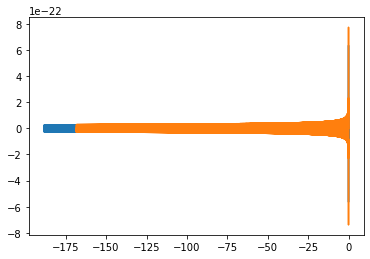

In [24]:
mtot = 1.46+1.27
mass1 = 2/3*mtot
mass2 = mass1/2
hp2, hc2 = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=mass1,
                         mass2=mass2,
                         delta_t=1.0/16384,
                         f_lower=20,
                         distance=40)
print(hp2.sample_times[-1]-hp2.sample_times[0])
print(hp.sample_times[-1]-hp.sample_times[0])
pylab.plot(hp2.sample_times, hp2, label='unequal mass')
pylab.plot(hp.sample_times, hp, label='nearly equal mass')